In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv')

X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LASSO Regression (L1) for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Selecting features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

# Bagging Regressor with selected features
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_selected, y_train)

# Predictions
y_pred = bagging_model.predict(X_test_selected)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mse, rmse, mae


 LASSO up

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from sklearn.feature_selection import f_classif 
from sklearn.feature_selection import SelectKBest, f_regression , mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv')

In [3]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score'].values.reshape(-1, 1)

In [ ]:
# Save the column names before scaling
#feature_names = X.columns.to_list()

In [ ]:
#scaler = MinMaxScaler()

# Fit and transform the data
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ANOVA 

In [ ]:
# Step 1: ANOVA F-test for feature selection
# SelectKBest will choose the top 'k' features based on ANOVA F-test scores
k = 20 # Adjust 'k' to select the number of features you want
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices and corresponding feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print(f'Selected features by ANOVA F-test: {selected_feature_names}')


# Step 2: Bagging Regressor with selected features
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_selected, y_train)

# Step 3: Predictions
y_pred = bagging_model.predict(X_test_selected)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
# Output the results
print(f"Mean Absolute Error: {mae}")

Mutual Information

In [ ]:
# Step 1: Mutual Information for feature selection
# SelectKBest will choose the top 'k' features based on MI scores
k = 23 # Adjust 'k' to select the number of features you want
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices and corresponding feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print(f'Selected features by Mutual Information: {selected_feature_names}')

# Step 2: Bagging Regressor with selected features
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_selected, y_train)
# Predictions
y_pred = bagging_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
# Output the results
print(f"Mean Absolute Error: {mae}")

FORWARD

In [6]:
# Step 1: Forward Feature Selection using Ridge as base estimator
# You can adjust n_features_to_select to control the number of features to be selected
ridge = Ridge()
sfs = SequentialFeatureSelector(ridge, n_features_to_select=20, direction='forward')
sfs.fit(X_train_scaled, y_train)

# Get the selected feature indices and corresponding feature names
selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print(f'Selected features by Forward Feature Selection: {selected_feature_names}')
# Step 2: Bagging Regressor with selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_selected, y_train)

# Step 3: Predictions
y_pred = bagging_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
# Output the results
print(f"Mean Absolute Error: {mae}")

Selected features by Forward Feature Selection: Index(['Age', 'Income', 'Loan_Amount', 'Loan_Term_Months', 'Rent_Payments',
       'Utility_Payments_On_Time', 'Mobile_Phone_Payment_On_Time',
       'Social_Media_Activity_Score', 'Transaction_Behavior_Score',
       'gender_female', 'gender_male', 'gender_non-binary',
       'demographics_Rural', 'demographics_Sub_Urban', 'demographics_Urban',
       'profession_Marketer Manager', 'profession_Software Engineer',
       'profession_Student', 'social mediaplatform_Instagram',
       'social mediaplatform_YouTube'],
      dtype='object')
Mean Squared Error: 0.08953958580097612
Root Mean Squared Error: 0.29923165908870025
Mean Absolute Error: 0.25333515482695806


/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


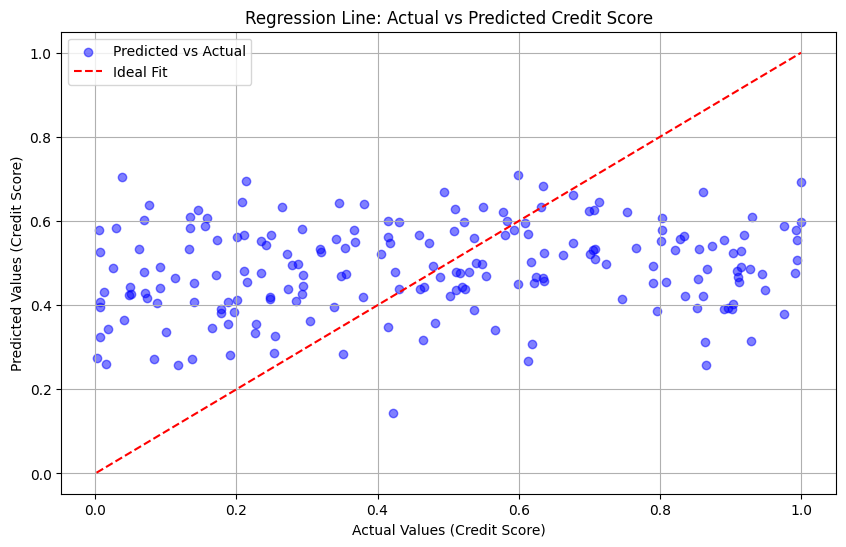

In [8]:
# Step 4: Plot regression line (Actual vs. Predicted values)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")

# Ideal fit line (where predicted = actual)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal Fit")

# Add labels and title
plt.xlabel("Actual Values (Credit Score)")
plt.ylabel("Predicted Values (Credit Score)")
plt.title("Regression Line: Actual vs Predicted Credit Score")
plt.legend()
plt.grid(True)
plt.show()


RANDOM FOREST FEATURE IMPORTANCE

In [ ]:
# Step 1: Train a Random Forest for feature importance
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)
# Step 2: Extract feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_
# Step 3: Select top k features based on importance
k = 28 # Select top 'k' features
indices = np.argsort(feature_importances)[-k:]  # Indices of top 'k' features
selected_feature_names = X.columns[indices]

# Print the selected features
print(f'Selected features based on Random Forest importance: {selected_feature_names}')
# Step 4: Use the selected features for training the Bagging Regressor
X_train_selected = X_train_scaled[:, indices]
X_test_selected = X_test_scaled[:, indices]

# Step 5: Train the Bagging Regressor model
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_selected, y_train)

# Step 6: Predictions
y_pred = bagging_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
# Output the results
print(f"Mean Absolute Error: {mae}")

RFECV

In [ ]:
# Step 1: RFE for feature selection using RandomForestRegressor as the base model
# You can use any estimator with feature importance like RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=random_forest, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

# Get the selected feature indices and corresponding feature names
selected_feature_indices = rfe.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print(f'Selected features by RFE: {selected_feature_names}')
# Step 2: Bagging Regressor with selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_selected, y_train)

# Step 3: Predictions
y_pred = bagging_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
# Output the results
print(f"Mean Absolute Error: {mae}")